In [1]:
import interferometer as ir
import matplotlib.pyplot as plt

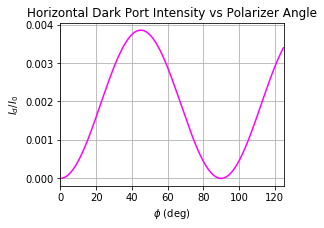

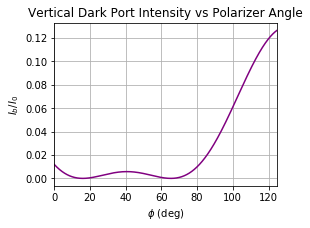

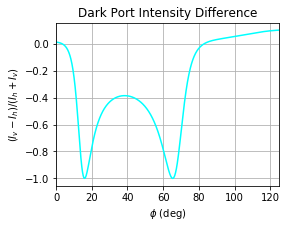

In [2]:
# Intesity going to darkport

theta1 = 10
theta3 = -40
theta2min=0
theta2max = 125


h = ir.horizontal(theta1,theta3,theta2min, theta2max)
"this plots the horizontal light coming out of the darkport"
h.savefig("horizontal_darkport.png",dpi=600,pad_inches= 0.25,bbox_inches="tight")
# Intesity going to brightport

v = ir.vertical(theta1,theta3,theta2min, theta2max)
"this plots the vertical light coming out of the darkport"
v.savefig("vertical_darkport.png",dpi=600,pad_inches=0.25,bbox_inches="tight")

s = ir.split(theta1,theta3,theta2min, theta2max)
"bright port minus dark ratio to total initial intensity"
s.savefig("difference_intensity.png", dpi=600,pad_inches=0.25,bbox_inches="tight")

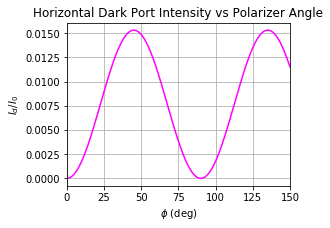

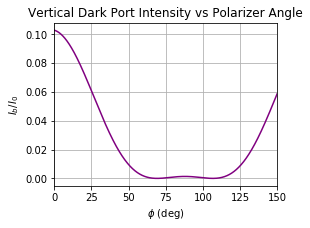

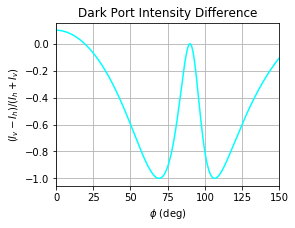

In [4]:
theta1 = 20
theta3 = -80
theta2min=0
theta2max = 150


h = ir.horizontal(theta1,theta3,theta2min, theta2max)
"this plots the horizontal light coming out of the darkport"
h.savefig("horizontal_darkport.png",dpi=600,pad_inches= 0.25,bbox_inches="tight")
# Intesity going to brightport

v = ir.vertical(theta1,theta3,theta2min, theta2max)
"this plots the vertical light coming out of the darkport"
v.savefig("vertical_darkport.png",dpi=600,pad_inches=0.25,bbox_inches="tight")

s = ir.split(theta1,theta3,theta2min, theta2max)
"bright port minus dark ratio to total initial intensity"
s.savefig("difference_intensity.png", dpi=600,pad_inches=0.25,bbox_inches="tight")

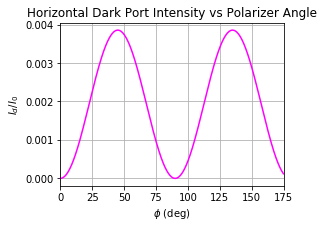

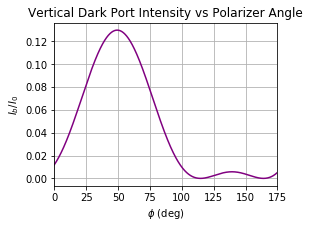

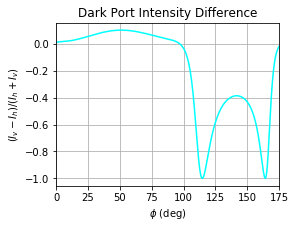

In [7]:
theta1 = -10
theta3 = 40
theta2min=0
theta2max = 175


h = ir.horizontal(theta1,theta3,theta2min, theta2max)
"this plots the horizontal light coming out of the darkport"
h.savefig("horizontal_darkport.png",dpi=600,pad_inches= 0.25,bbox_inches="tight")
# Intesity going to brightport

v = ir.vertical(theta1,theta3,theta2min, theta2max)
"this plots the vertical light coming out of the darkport"
v.savefig("vertical_darkport.png",dpi=600,pad_inches=0.25,bbox_inches="tight")

s = ir.split(theta1,theta3,theta2min, theta2max)
"bright port minus dark ratio to total initial intensity"
s.savefig("difference_intensity.png", dpi=600,pad_inches=0.25,bbox_inches="tight")

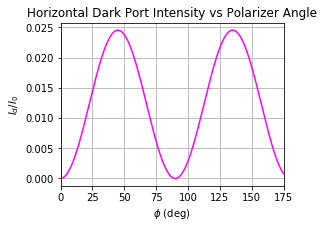

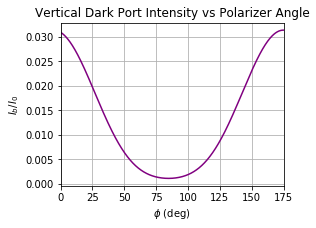

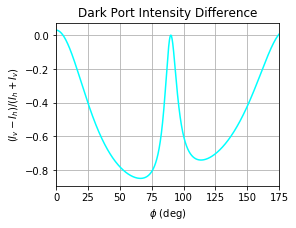

In [9]:
theta1 = -80
theta3 = 90
theta2min=0
theta2max = 175


h = ir.horizontal(theta1,theta3,theta2min, theta2max)
"this plots the horizontal light coming out of the darkport"
h.savefig("horizontal_darkport.png",dpi=600,pad_inches= 0.25,bbox_inches="tight")
# Intesity going to brightport

v = ir.vertical(theta1,theta3,theta2min, theta2max)
"this plots the vertical light coming out of the darkport"
v.savefig("vertical_darkport.png",dpi=600,pad_inches=0.25,bbox_inches="tight")

s = ir.split(theta1,theta3,theta2min, theta2max)
"bright port minus dark ratio to total initial intensity"
s.savefig("difference_intensity.png", dpi=600,pad_inches=0.25,bbox_inches="tight")